In [24]:
#import the necessary libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#loading data into pandas dataframe
data=pd.read_csv("letter.csv")

In [3]:
#reading the first five row of the data
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f609,f610,f611,f612,f613,f614,f615,f616,f617,class
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,'1'
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,'1'
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,'2'
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,'2'
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,'3'


In [4]:
#reading the last five row of the data
data.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f609,f610,f611,f612,f613,f614,f615,f616,f617,class
7792,-0.6842,-0.3280,-0.1984,0.2956,0.8786,0.8948,0.3118,0.1822,0.1012,0.1740,...,0.7738,0.7738,0.7142,0.6428,0.5952,0.5714,0.3928,0.4286,0.2858,'24'
7793,-0.5912,-0.2420,0.8174,1.0000,0.4642,0.6428,0.6944,0.3056,-0.3888,-0.6826,...,0.1924,-0.1154,0.0192,0.2116,-0.0384,0.0192,-0.2308,-0.4230,-0.7116,'25'
7794,-0.6696,-0.3730,0.1584,0.8910,1.0000,0.9762,0.9762,0.7684,0.4106,0.0154,...,0.0910,0.1818,0.2000,0.1454,0.0182,-0.2910,0.0728,0.0728,-0.5818,'25'
7795,-0.5764,-0.1764,0.5106,0.3742,-0.1670,-0.5858,-0.7882,-0.7224,-0.6330,-0.8212,...,0.4130,0.5870,0.4348,0.5652,0.3478,-0.0434,0.3044,-0.0434,-0.5000,'26'
7796,-0.6624,-0.3334,0.3666,0.4292,-0.2084,-0.5374,-0.4542,-0.6208,-0.6376,-0.5042,...,0.2520,0.2846,0.4146,0.3170,0.2520,-0.0244,-0.0894,-0.1708,-0.3170,'26'


In [5]:
#getting more info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Columns: 618 entries, f1 to class
dtypes: float64(613), int64(4), object(1)
memory usage: 36.8+ MB


In [6]:
#checking for null value
data.isnull().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
        ..
f614     0
f615     0
f616     0
f617     0
class    0
Length: 618, dtype: int64

THIS TRUNCATE THE COLUMN AND ONE CAN'T SAY YET IF NULL VALUES ARE PRESENT.BELOW IS ANOTHER WAY TO CONFIRM

In [7]:
for i in data.columns:
    if data[i].isnull().sum()!= 0:
         print(i)

ZERO OUTPUT SHOWS THE DATA IS NULL FREE


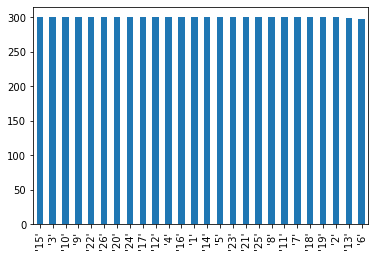

In [8]:
#checking for imbalance set in thr target column
data["class"].value_counts().plot(kind="bar")
plt.show()

THE DATA IS BALANCED

In [9]:
#sepating the data into feature and and target column

target=data.pop("class")

In [10]:
data.shape

(7797, 617)

In [11]:
#spliting the data into train and and test set
feature_train,feature_test,target_train,target_test=train_test_split(data,target,random_state=15)

In [12]:
#instantiating the model
rf=RandomForestClassifier(random_state=42,n_estimators=10)

#model fitting

rf.fit(feature_train,target_train)

#prediction on both train and test data

pred_train=rf.predict(feature_train)
pred_test=rf.predict(feature_test)

#checking the accurary

print(f"Accuracy on train data is {accuracy_score(pred_train,target_train)}")
print(f"Accuracy on test data is {accuracy_score(pred_test,target_test)}")

Accuracy on train data is 0.9988028048571918
Accuracy on test data is 0.9041025641025641


A GREAT RESULT BUT OVERFITTING OCCUR,HAND TUNING THE HYPERPARAMETER TO GET A BETTING RESULT AND TO PREVENT OVERFITTING

In [13]:
#instantiating the model and tuning the n_estimators
rf=RandomForestClassifier(random_state=42,n_estimators=60)

#model fitting

rf.fit(feature_train,target_train)

#prediction on both train and test data

pred_train=rf.predict(feature_train)
pred_test=rf.predict(feature_test)

#checking the accurary

print(f"Accuracy on train data is {accuracy_score(pred_train,target_train)}")
print(f"Accuracy on test data is {accuracy_score(pred_test,target_test)}")

Accuracy on train data is 1.0
Accuracy on test data is 0.941025641025641


In [14]:
#instantiating the model and tuning the max_depth
rf=RandomForestClassifier(
    random_state=42,n_estimators=60,
    max_depth=9)

#model fitting

rf.fit(feature_train,target_train)

#prediction on both train and test data

pred_train=rf.predict(feature_train)
pred_test=rf.predict(feature_test)

#checking the accurary

print(f"Accuracy on train data is {accuracy_score(pred_train,target_train)}")
print(f"Accuracy on test data is {accuracy_score(pred_test,target_test)}")

Accuracy on train data is 0.9728065674704977
Accuracy on test data is 0.9307692307692308


In [15]:
#instantiating the model and tuning the min_samples_leaf 
rf=RandomForestClassifier(
    random_state=42,n_estimators=60,
    max_depth=9,min_samples_leaf=50 )

#model fitting

rf.fit(feature_train,target_train)

#prediction on both train and test data

pred_train=rf.predict(feature_train)
pred_test=rf.predict(feature_test)

#checking the accurary

print(f"Accuracy on train data is {accuracy_score(pred_train,target_train)}")
print(f"Accuracy on test data is {accuracy_score(pred_test,target_test)}")

Accuracy on train data is 0.9163673678809646
Accuracy on test data is 0.8994871794871795


In [23]:
#instantiating the model and tuning the max_features
rf=RandomForestClassifier(
    random_state=42,n_estimators=60,
    max_depth=9,min_samples_leaf=50,
    max_features=0.25)

#model fitting

rf.fit(feature_train,target_train)

#prediction on both train and test data

pred_train=rf.predict(feature_train)
pred_test=rf.predict(feature_test)

#checking the accurary

print(f"Accuracy on train data is {accuracy_score(pred_train,target_train)}")
print(f"Accuracy on test data is {accuracy_score(pred_test,target_test)}")

Accuracy on train data is 0.9020010261672653
Accuracy on test data is 0.8928205128205128


THIS A BETTER RESULT

In [27]:
#checking confusion matrix and classification report

print(classification_report(pred_test,target_test))

              precision    recall  f1-score   support

         '1'       0.96      0.81      0.88        91
        '10'       0.85      0.81      0.83        84
        '11'       0.76      0.92      0.83        61
        '12'       0.97      0.88      0.93        85
        '13'       0.94      0.85      0.89        78
        '14'       0.80      0.95      0.87        63
        '15'       0.90      0.96      0.93        80
        '16'       0.74      0.82      0.78        67
        '17'       0.92      0.96      0.94        70
        '18'       0.99      0.99      0.99        73
        '19'       0.96      0.98      0.97        96
         '2'       0.92      0.77      0.84        92
        '20'       0.85      0.88      0.86        64
        '21'       0.98      0.81      0.89       102
        '22'       0.73      0.74      0.73        61
        '23'       0.59      1.00      0.75        44
        '24'       0.99      0.97      0.98        72
        '25'       0.95    

ALTHOUGH THE MODEL IS WORST IN CLASSIFYING SOME LETTER WELL,BUT STILL A BETTER MODEL CHECKING FROM THE RECALL VALUE.